In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix
from sklearn import tree

In [2]:
file_name = "Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx"
df = pd.read_excel(file_name, sheet_name="Foglio1", nrows=279, usecols="A:P")
df

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0
276,F,44,15.7,356.0,NaN,NaN,NaN,NaN,NaN,2.4,31.0,17.0,NaN,NaN,272.0,0
277,F,41,12.0,321.0,6.7,2.3,1.6,1.3,0.1,41.2,16.0,11.0,201.0,14.0,266.0,0


In [3]:
df['SESSO'].replace(['M','F'], [0,1],inplace=True)
df['TARGET'].replace([1, 2], [1,1], inplace=True)
pure_df = df.dropna()
pure_df


,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,0,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
3,0,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
8,0,75,11.6,123.0,10.0,0.8,0.7,0.0,0.0,244.6,53.0,37.0,43.0,27.0,439.0,1
13,0,87,8.7,93.0,6.8,1.3,0.6,0.0,0.0,201.3,36.0,28.0,73.0,63.0,375.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,36,7.7,300.0,4.5,2.2,0.8,0.2,0.0,33.1,37.0,26.0,71.0,43.0,294.0,0
267,0,59,6.8,171.0,5.7,0.7,0.5,0.0,0.0,110.2,41.0,36.0,80.0,147.0,359.0,0
270,1,81,13.0,205.0,9.4,3.0,0.5,0.0,0.1,52.1,18.0,26.0,72.0,64.0,304.0,0
273,1,30,6.8,362.0,4.5,1.9,0.4,0.0,0.0,28.1,24.0,12.0,55.0,60.0,357.0,0


In [4]:
dataset = pure_df.to_numpy()
np.random.seed(9)
train_index = np.random.rand(83) <= 0.7
test_index = np.logical_not(train_index)
train_dataset, test_dataset = dataset[train_index], dataset[test_index]

def normalize_dataset (train_dataset: np.array, test_dataset: np.array):
    min_v = train_dataset.min(axis=0)
    max_v = train_dataset.max(axis=0)
    train_dataset = (train_dataset - min_v) / (max_v - min_v)
    test_dataset = (test_dataset - min_v) / (max_v - min_v)
    return train_dataset, test_dataset

# normalize_train_dataset, normalize_test_dataset = normalize_dataset(train_dataset, test_dataset)


In [5]:
clfs = []
for i in range(train_dataset.shape[1] - 1):
    x_train = train_dataset[:,i].reshape(-1, 1) #feature column
    y_train = train_dataset[:,-1].astype('int')
    x_test = test_dataset[:,i].reshape(-1, 1) #feature column
    y_test = test_dataset[:,-1].astype('int')
    clf = tree.DecisionTreeClassifier(max_depth=2)
    clf = clf.fit(x_train, y_train)  
    print(clf.score(x_test, y_test))
    clfs.append(clf)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(normalize_train_dataset[:,:-1], normalize_train_dataset[:,-1].astype('int'))
# clf.score(normalize_test_dataset[:,:-1], normalize_test_dataset[:,-1].astype('int'))
# tree.plot_tree(clf)

0.8181818181818182
0.8636363636363636
0.6818181818181818
0.5454545454545454
0.6818181818181818
0.7727272727272727
0.7272727272727273
0.7727272727272727
0.8636363636363636
0.8181818181818182
0.9090909090909091
0.8181818181818182
0.7727272727272727
0.8636363636363636
0.8181818181818182


[Text(0.4, 0.8333333333333334, 'X[0] <= 36.5\ngini = 0.429\nsamples = 61\nvalue = [19, 42]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'X[0] <= 91.0\ngini = 0.375\nsamples = 56\nvalue = [14, 42]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.361\nsamples = 55\nvalue = [13, 42]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

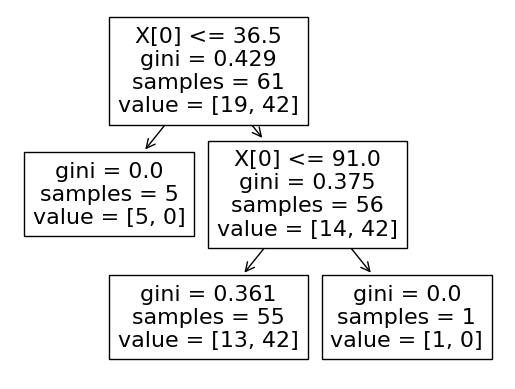

In [8]:

boundries = [[0.5], [36.5, 91.0], [6.05, 10.95, 11.55], [170.5, 196.0, 368.5], [3.3, 3.75, 10.25], [1.35, 2.1, 2.9],
             [0.35, 0.75, 1.05], [0.05, 0.35], [0.05], [1.7, 223.45], [20.5, 42.0], [41.5, 44.5, 62.5], 
             [45.0, 53.5, 56.5], [13.0,16.5, 169.5], [197.0, 274.5]
             ]

tree.plot_tree(clfs[1])